### Принятие решений в бизнесе на основе данных

В рамках данного проекта необходимо для интернет-магазина приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты.

В распоряжении имеются 9 гипотез по увеличению выручки интернет-магазина и результаты А/В-теста.

Исследование состоит из двух частей:

Приоритизация гипотез
Анализ А/В-теста
По результатам исследования напишем общий вывод.


 Шаг 1. Приоритизация гипотез.
 
Задача

- Применить фреймворк ICE 
- Применить фреймворк RICE


 Шаг 2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.


Цель: Принять решение по результатам теста и объясните его


Задача

Проанализировать A/B-тест:
- Путем построения графиков кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A.

- Посчитать статистическую значимость различий в конверсии, в среднем чеке заказа между группами, перцентили стоимости, количества заказов, 


## Загрузка данных 

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
#Читаем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
orders = pd.read_csv('/datasets/orders.csv')

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
#Подготавливаем данные к анализу

In [6]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
hypothesis.duplicated().sum()

0

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

In [15]:
#преобразуем дату в нужный тип

In [16]:
hypothesis.columns = hypothesis.columns.str.lower()

In [17]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


##  Вывод:
Прочитал файлы, преобразовал столбцы в нужный тип и регистр, явных дубликатов не обнаружено.


Представлены типы данных:
- datetime64 (после преобразования из object)
- object        
- int64 

## 1. Приоритизация гипотез.
# Задача
- Применим фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

In [20]:
pd.options.display.max_colwidth = 400
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [21]:
#Применияем фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [22]:
#Применияем фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

### 1.1 Вывод
- Результат фреймворка ICE (первые номера пяти гипотез) - Гипотезы под индексом: 8, 0, 7, 6, 2.

- Результат фреймворка RICE - Гипотезы под индексом: 7, 2, 0, 6, 8.



Результаты двух фреймворков отличаются, потому что во фреймворк RICE добавляется параметр "reach", который отвечает за охват( скольких пользователей затронет изменение, которое мы хотим внести)

##  2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
# Задача
Проанализируем A/B-тест:
- Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Построим график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Построим точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примем решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Перед проведением A/B-теста, нужно проверить пересечение групп.

In [23]:
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"') 
  
# получаем количество пользователей, попавших в обе группы 
group_similar = list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
print("количество",len(group_similar),
group_similar[0:5])

количество 58 [8300375, 199603092, 232979603, 237748145, 276558944]


In [24]:
#Убираем лишних пользователей, попавших в обе группы
orders = orders.query('visitorId != @group_similar')

In [25]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [26]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Начинаем анализ A/B-теста

### Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.

Объявим датафрейм cumulativeData со столбцами:
    
    
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [28]:
plt.rcParams['figure.figsize'] = [12, 5]

Задаю параметр размера для всех графиков ниже.

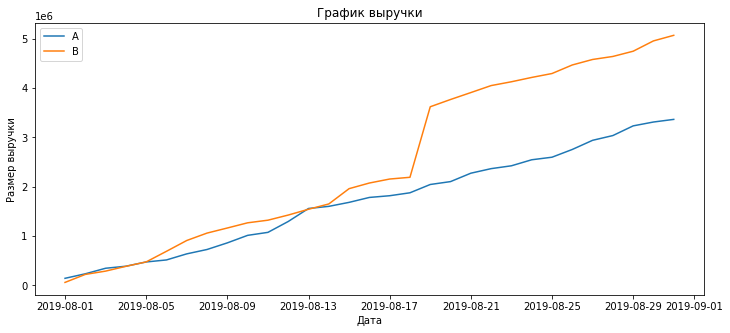

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График выручки')
plt.xlabel('Дата')
plt.ylabel('Размер выручки')
plt.legend()
plt.show()

#### Вывод:
Выручка увеличивается в течение всего теста у обоих групп, но группа "В" в какой-то момент сделала резкий скачок вверх, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке группы В.

Можем зафиксировать аномалию в группе В.

### Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

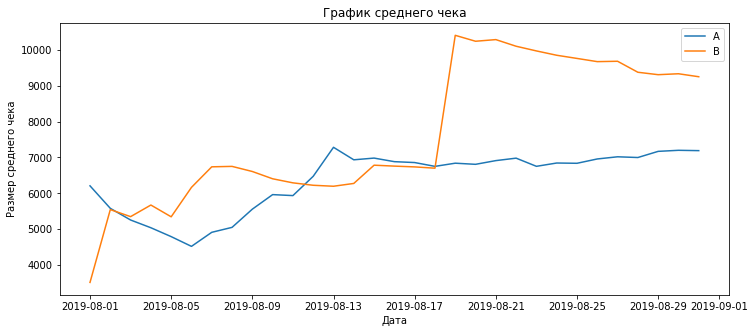

In [30]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека')
plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.legend()

#### Вывод:
Средний чек тоже показывает резкий скачок группы "В".


Возможно, в группу B  в определённый момент теста попали крупные заказы (резкий всплеск на графике). 

Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

И тут так-же группа В выделяется.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Чтобы нагляднее увидеть разницу между группами, строят график относительного различия. 

Каждую его точку рассчитывают так: кумулятивная метрика группы B / кумулятивная метрика группы A - 1

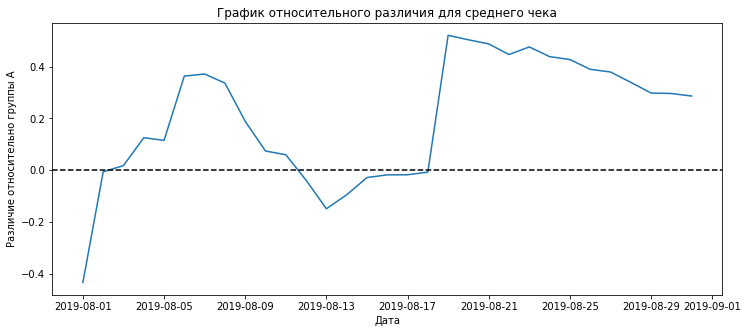

In [31]:
#Построим график относительного различия для среднего чека. 
#Добавим горизонтальную ось методом axhline()

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата')
plt.ylabel('Различие относительно группы А')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### Вывод:
В нескольких точках график различия между сегментами резко «скачет». 

Где-то уж точно спрятались крупные заказы и выбросы

### Построим график кумулятивной конверсии по группам. Сделайте выводы и предположения.

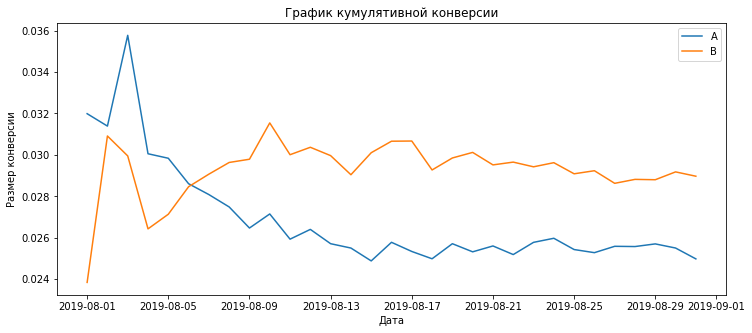

In [32]:
#Аналогично проанализируем график кумулятивной конверсии. 
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Размер конверсии')
plt.show()


#### Вывод:

По графику видно, что группа А изначально была выше группы В, но со временем конверсия группы В стала выше, а конверсия группа А просела и зафиксировалась.



### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

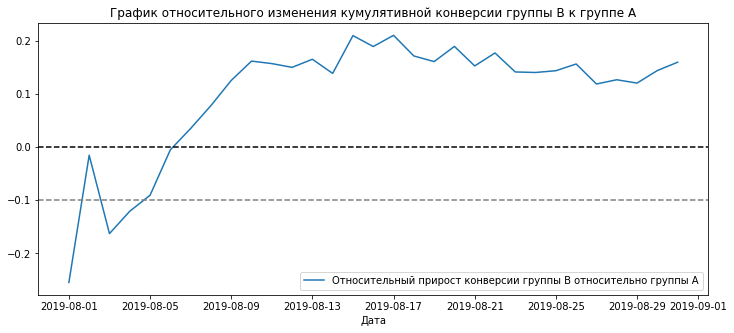

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

#### Вывод:

В начале теста группа B значительно проигрывала группе A, вскоре вырвалась вперёд и постепенно растёт, с небольшими падениями. 


### Построим точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [34]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Есть пользователи, которые совершали 3, 2 и 1 заказ.

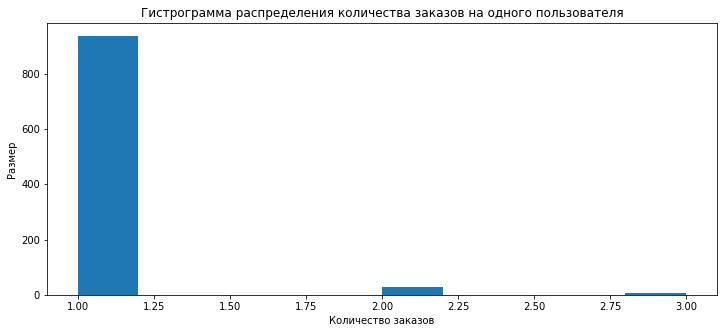

In [35]:
#Построим гистрограмму распределения количества заказов на одного пользователя.
plt.hist(ordersByUsers['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Размер')
plt.show()

Больше всего пользователей, которые заказывали 1 раз.

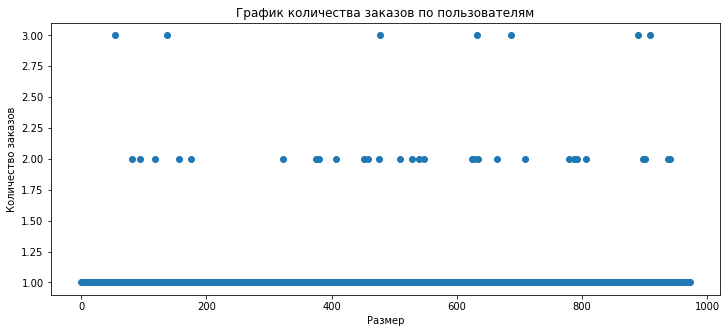

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Размер')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод:
Большинство покупателей заказывали только один раз. Могу предположить что, доля пользователей с 2-3 заказами незначительна.

Их точная доля не ясна — непонятно, считать их аномалиями или нет.

Посчитаем выборочные перцентили.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [37]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


In [38]:
#посмотрим визуально количество 
ordersByUsers['orders'].value_counts()

1    937
2     29
3      7
Name: orders, dtype: int64

#### Вывод:
Не более 1% пользователей оформляли больше чем 2 заказа. 95% пользователей заказывали только один раз.

### Построим точечный график стоимостей заказов. Сделайте выводы и предположения.

In [39]:
#выручка заказа с максимальной стоимостью
orders['revenue'].max()

1294500

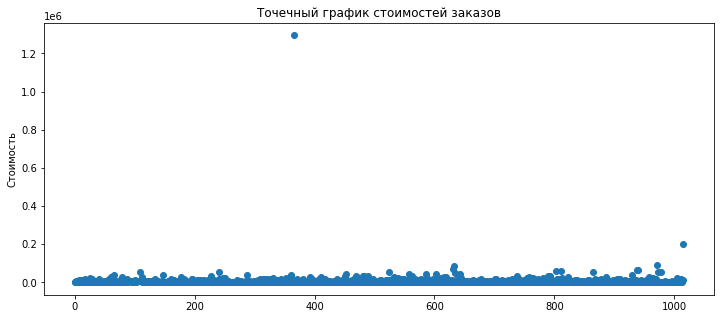

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

В данных явно есть очень дорогой заказ

In [41]:
revenueByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)

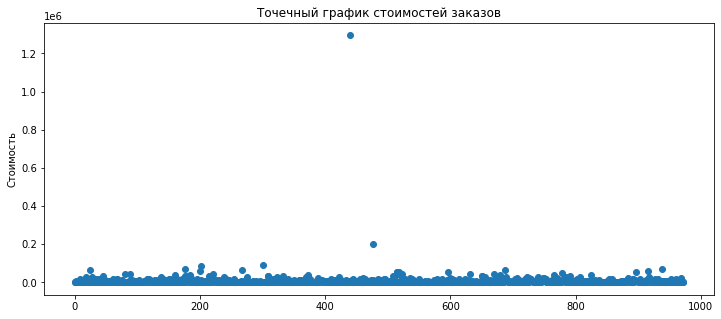

In [42]:
#также потроил с группировкой и посмотрел на результат
x_values = pd.Series(range(0,len(revenueByUsers['revenue'])))
plt.scatter(x_values, revenueByUsers['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

#### Вывод:
В данных есть очень дорогие заказы.


Посчитаем выборочные перцентили  стоимости заказов.


### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
#Определим 90, 95 и 99 перцентили среднего чека в выборке:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


In [44]:
#посчитал перцентили по группировке
print(np.percentile(revenueByUsers['revenue'], [90, 95, 99]))

[18236. 28910. 59082.]


#### Вывод:
Не более 1% пользователей оформляли больше чем 2 заказа. 95% пользователей заказывали только один раз.

Также посчитал перцентили среднего чека. 

Не более 5% выручек заказов составила 26785 (рубль, доллар, лира, без понятия, недостаточно данных ^_^ ).

Мы оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы, нашли выбросы и нашли границу для их определения.


Посчитаем статистическую значимость различий в конверсии и среднем чеке 
между группами по «сырым» данным — без удаления аномальных пользователей.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

# Сформулируем гипотезы. 
- H0: различий в конверсии между группами A и B нет. 
- H1: различия в конверсии между группами A и B есть.

In [45]:
#Начнём с подготовки данных.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,22,162043,37,234381,39,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,53,288850,507,509,1845,1803
3,2019-08-04,11,41176,13,96890,72,388030,66,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,87,475648,756,707,3318,3280


# Названия столбцов данных:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [46]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

- Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
- Тем, кто ничего не заказал, будут соответствовать нули. 
- Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [47]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 
#Округлим до трёх знаков после запятой.
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.011
0.160


#### Вывод:


Первое число — p-value = 0.011 меньше 0.05. 


Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Различия в конверсии между группами есть.


Относительный выигрыш группы B равен + 16% — Это показывает второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


#### Вывод:

P-value значительно больше 0.05. 

Наблюдаемое различие в 28.7% в группе В не является статистически значимым.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785 рублей. 

Так мы уберём 1% пользователей с наибольшим числом заказов и до 5% пользователей с дорогими заказами. 


Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 26 785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
#Узнаем, сколько всего аномальных пользователей методом shape()
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
86


Всего 86 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. 

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [50]:
#Сначала подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [51]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.174


#### Вывод:
Результаты по конверсии практически не изменились.

- Первое число — p-value, также ниже 0.05, значит Различия в конверсиях есть,нулевую гипотезу отвергаем. 

- Второе число - выигрыш группы B равен + 17.4%



### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [52]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


#### Вывод: 
Первое число - P-value уменьшился было - 0.829, стало - 0.727, P-value по-прежнему больше 0.05. 

Различий нет, средние чеки равны. 

Разница в среднем чеке между сегментами сократилась с +28.7% до -0.3%.(второе число в выводе.) 



Имеющиеся факты:
    
    
- Есть статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий(выигрыш группы B + 17.4%);


- Нет статистически значимого различия по среднему чеку между группами по «сырым», но по данным после фильтрации есть изменения. Различий нет, средние чеки равны. Разница в среднем чеке между сегментами сократилась с +28.7% до -0.3%.



###  Примем решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Посмотрим на графики по очищенным данным

In [53]:
# В пункте 12 мы нашли аномальных пользователей, а сейчас сделаем срез данных без низ и проанализируем графики.
abnormalUsers_3 =  list(abnormalUsers)

In [54]:
orders_clean = orders.query('visitorId != @abnormalUsers_3')

In [55]:
# создаем массив уникальных пар значений дат и групп теста по очищенным данным
datesGroups = orders_clean[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах  по очищенным данным
ordersAggregated = datesGroups.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      13      13    31869       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      28      28    78352      1338
3 2019-08-02     B      35      35   144622      1294
4 2019-08-03     A      52      52   190825      1845


# График кумулятивной выручки по группам

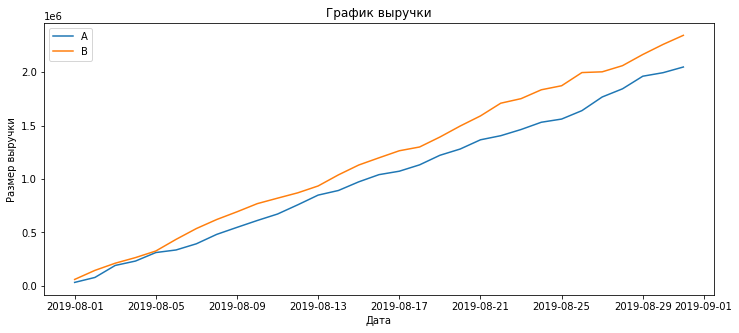

In [56]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('График выручки')
plt.xlabel('Дата')
plt.ylabel('Размер выручки')
plt.legend()
plt.show()

# График кумулятивного среднего чека по группам

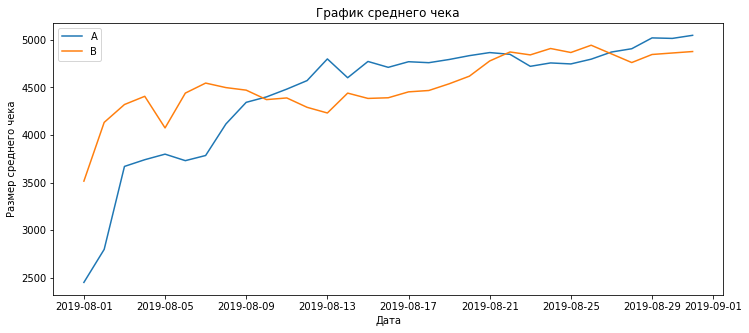

In [57]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека')
plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.legend()
plt.show()

# График относительного различия для среднего чека по очищенным данным

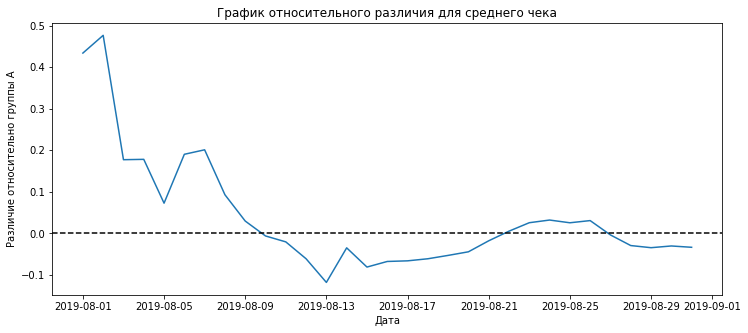

In [58]:
#Построим график относительного различия для среднего чека. 
#Добавим горизонтальную ось методом axhline()

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата')
plt.ylabel('Различие относительно группы А')
plt.show()

# Вывод: График различия среднего чека говорит о том, что результаты группы B не такие уж и успешные, как могли показаться на первый взгляд(до удаления аномалий) и сейчас можно сказать что группа А стоит выше группы В.

# График кумулятивной конверсии по группам.

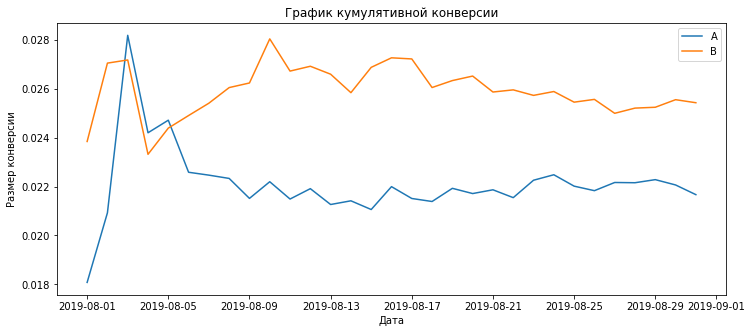

In [59]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Размер конверсии')
plt.show()


# График относительного изменения кумулятивной конверсии группы B к группе A

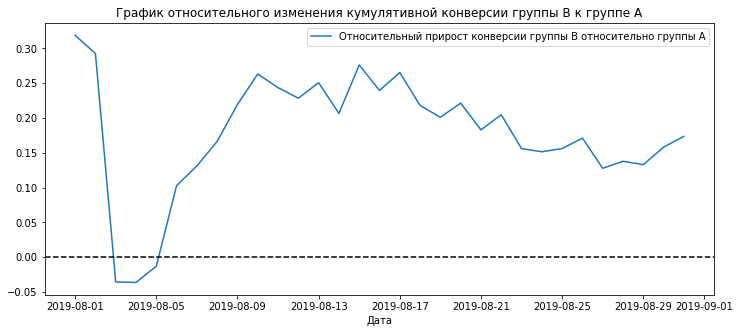

In [60]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

#### Вывод:

График относительного изменения кумулятивной конверсии группы B к группе A сообщает, что результаты группы B лучше,у группы A и нет значительной тенденции к улучшению

#### Вывод:

- Есть статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий(выигрыш группы B + 17.4%);

- Нет статистически значимого различия по среднему чеку между группами по «сырым», но по данным после фильтрации есть изменения. Различий нет, средние чеки равны. Разница в среднем чеке между сегментами сократилась с +28.7% до -0.3%.

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A

- График различия среднего чека говорит о том, что результаты группы B хуже группы А

Исходя из фактов выше,я считаю, что нужно остановить тест, признать его успешным и перейти к проверке следующей гипотезы.  

По средним чекам группы равны. По различию конверсии победа группы В. 

Тут тест окрасился только на половину - по конверсии. Но это тоже хорошо (хотя, надо принимать во внимание, что было важнее - увеличить средний чек или конверсию). И значит мы заканчиваем анализ A/B-теста - он оказался успешным! 🙂